In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from pathlib import Path
import sys

try:
    ROOT = Path().resolve().parents[1]
    assert (ROOT / "common").exists()
except AssertionError:
    ROOT = next(p for p in Path().resolve().parents if (p / "common").exists())

if str(ROOT) not in sys.path:
    sys.path.append(str(ROOT))

In [3]:
#print(ROOT)

In [4]:
from common import sensors as sn 
from common import subspace_methods as sm
from common import map_em_tools as met
from common import log_funcs as lf

In [5]:
DIST_RATIO = 0.5

In [6]:
Num_sensors1 = 25
Num_emitters1 = 1
sample_size1 = 12

failing_sensors1 = np.arange(5)
gap_ratio1 = 0.5 * np.ones_like(failing_sensors1, dtype=np.float32)

theta1_rad = np.array([0.7]) # Угловые координаты источников (DoA) в радианах
theta1_deg = np.rad2deg(theta1_rad) # Угловые координаты источников (DoA) в градусах
P1 = 0.5 * np.eye(Num_emitters1, dtype=np.float64) # Ковариация сигналов
Q1 = 8.1 * np.eye(Num_sensors1, dtype=np.float64) # Ковариация шумов
A1 = (np.exp(-2j * np.pi * DIST_RATIO * np.arange(Num_sensors1).reshape(-1,1) * 
             np.sin(theta1_rad))) # Матрица векторов направленности
# Генерация сигналов, шумов и наблюдений
S1 = sn.gss(Num_emitters1, sample_size1, P1)
N1 = sn.gss(Num_sensors1, sample_size1, Q1)
X1 = (A1 @ S1.T + N1.T).T
X1_with_mv = sn.MCAR(X1, failing_sensors1, gap_ratio1)
R1 = sn.initial_Cov(X1_with_mv)
MUSIC_theta1 = sm.MUSIC_DoA(R1, Num_emitters1)

Psi = 1.1 * P1
nu = 10 * P1.shape[0]

In [7]:
MUSIC_theta1

array([0.71558499])

In [8]:
sn.SNR(A1, P1, Q1, metrics = 'avg', scale = 'linear')

np.float64(1.54320987654321)

In [9]:
EM_theta1_rad, EM_P1, lhd_1, lhd_list1, angles_list1 = met.multistart_EM(X1_with_mv, 
                                                                         Num_emitters1, 
                                                                         Q=Q1,
                                                                         theta_guess=MUSIC_theta1,
                                                                         Psi=Psi,
                                                                         nu=nu, 
                                                                         num_of_starts=1, 
                                                                         max_iter=50, 
                                                                         rtol_params=1e-6,
                                                                         rtol_lkhd=1e-6,
                                                                         reg_coef=1e-5)

0-th start
theta=[0.71558499],P=[[1.18642836e-07-1.98523347e-24j]]
Inital log_posterior = -4636457.408280083
Iteration=1
new_angles=[0.72207638]
new_P:
[[0.02392308+0.j]]
Log_posterior is -850.4030723847867 on iteration 1.
Iteration=2
new_angles=[0.71688292]
new_P:
[[0.02532887+0.j]]
Log_posterior is -849.5007609901628 on iteration 2.
Iteration=3
new_angles=[0.71277335]
new_P:
[[0.02546212+0.j]]
Log_posterior is -849.3341589645278 on iteration 3.
Iteration=4
new_angles=[0.70952274]
new_P:
[[0.02549538+0.j]]
Log_posterior is -849.2522219289507 on iteration 4.
Iteration=5
new_angles=[0.70695118]
new_P:
[[0.02551556+0.j]]
Log_posterior is -849.1998427705342 on iteration 5.
Iteration=6
new_angles=[0.7048829]
new_P:
[[0.0255311+0.j]]
Log_posterior is -849.164389353901 on iteration 6.
Iteration=7
new_angles=[0.70323773]
new_P:
[[0.02554399+0.j]]
Log_posterior is -849.140077627059 on iteration 7.
Iteration=8
new_angles=[0.7019037]
new_P:
[[0.02555517+0.j]]
Log_posterior is -849.1227612098727 

In [10]:
EM_theta1_rad, EM_P1

(array([0.69644926]), array([[0.02591632+0.j]]))

In [11]:
lf.log_posterior(X1_with_mv, EM_theta1_rad, EM_P1, Q1, Psi, nu), lf.log_posterior(X1_with_mv, theta1_rad, P1, Q1, Psi, nu)

(np.float64(-848.923282388635), np.float64(-845.876500178015))

In [12]:
lhd_list1 = np.array(lhd_list1)
angles_list1 = np.rad2deg(np.array(angles_list1))
x1 = np.arange(len(angles_list1))

In [13]:
Num_sensors2 = 25
Num_emitters2 = 1
sample_size2 = 11

failing_sensors2 = np.arange(8)
gap_ratio2 = 0.5 * np.ones_like(failing_sensors2, dtype=np.float32)

theta2_rad = np.array([0.7]) # Угловые координаты источников (DoA) в радианах
theta2_deg = np.rad2deg(theta2_rad) # Угловые координаты источников (DoA) в градусах
P2 = 0.5 * np.eye(Num_emitters2, dtype=np.float64) # Ковариация сигналов
Q2 = 6.1 * np.eye(Num_sensors2, dtype=np.float64) # Ковариация шумов
A2 = (np.exp(-2j * np.pi * DIST_RATIO * np.arange(Num_sensors2).reshape(-1,1) * 
             np.sin(theta2_rad))) # Матрица векторов направленности
# Генерация сигналов, шумов и наблюдений
S2 = sn.gss(Num_emitters2, sample_size2, P2)
N2 = sn.gss(Num_sensors2, sample_size2, Q2)
X2 = (A2 @ S2.T + N2.T).T
X2_with_mv = sn.MCAR(X2, failing_sensors2, gap_ratio2)
R2 = sn.initial_Cov(X2_with_mv)
MUSIC_theta2 = sm.MUSIC_DoA(R2, Num_emitters2)

In [14]:
MUSIC_theta2

array([0.72431164])

In [15]:
sn.SNR(A2, P2, Q2, metrics = 'avg', scale = 'linear')

np.float64(2.0491803278688523)

In [16]:
EM_theta2_rad, EM_P2, lhd_2, lhd_list2, angles_list2 = met.multistart_EM(X2_with_mv, 
                                                                         Num_emitters2, 
                                                                         Q=Q2,
                                                                         theta_guess=MUSIC_theta2,
                                                                         Psi=Psi,
                                                                         nu=nu,  
                                                                         num_of_starts=1, 
                                                                         max_iter=50, 
                                                                         rtol_params=1e-6,
                                                                         rtol_lkhd=1e-6,
                                                                         reg_coef=1e-5)

0-th start
theta=[0.72431164],P=[[7.5917774e-08+4.13590306e-24j]]
Inital log_posterior = -7245189.527913359
Iteration=1
new_angles=[0.72431164]
new_P:
[[0.02501002+0.j]]
Log_posterior is -668.8223950999808 on iteration 1.
Iteration=2
new_angles=[0.71999701]
new_P:
[[0.02664231+0.j]]
Log_posterior is -667.9086055838097 on iteration 2.
Iteration=3
new_angles=[0.71650773]
new_P:
[[0.0268196+0.j]]
Log_posterior is -667.7371859811758 on iteration 3.
Iteration=4
new_angles=[0.71367475]
new_P:
[[0.02686977+0.j]]
Log_posterior is -667.6513701189406 on iteration 4.
Iteration=5
new_angles=[0.71136847]
new_P:
[[0.02690323+0.j]]
Log_posterior is -667.5932919479723 on iteration 5.
Iteration=6
new_angles=[0.70948859]
new_P:
[[0.0269312+0.j]]
Log_posterior is -667.5515924070413 on iteration 6.
Iteration=7
new_angles=[0.70796109]
new_P:
[[0.02695593+0.j]]
Log_posterior is -667.5208887269861 on iteration 7.
Iteration=8
new_angles=[0.70671576]
new_P:
[[0.0269785+0.j]]
Log_posterior is -667.4975563861618

In [17]:
EM_theta2_rad, EM_P2

(array([0.70079906]), array([[0.02778388+0.j]]))

In [18]:
lf.log_posterior(X2_with_mv, EM_theta2_rad, EM_P2, Q2, Psi, nu), lf.log_posterior(X2_with_mv, theta2_rad, P2, Q2, Psi, nu)

(np.float64(-667.1276018305018), np.float64(-667.1221200222807))

In [19]:
lhd_list2 = np.array(lhd_list2)
angles_list2 = np.rad2deg(np.array(angles_list2))
x2 = np.arange(len(angles_list2))

In [20]:
x_grid = np.arange(1,50,5)

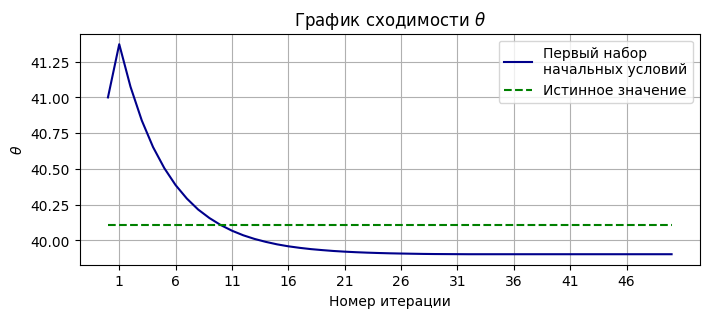

In [21]:
plt.figure(figsize=(8, 3))
plt.title(r'$\text{График сходимости} \,\,\theta$')
plt.plot(x1, angles_list1,color='darkblue', label=f'Первый набор\nначальных условий')
plt.plot(x1, np.tile(theta1_deg, len(angles_list1)), color='green', label='Истинное значение', linestyle='--')
plt.xlabel('Номер итерации') 
plt.ylabel(r'$\theta$')
plt.xticks(x_grid)
plt.legend()
plt.grid()
plt.show()

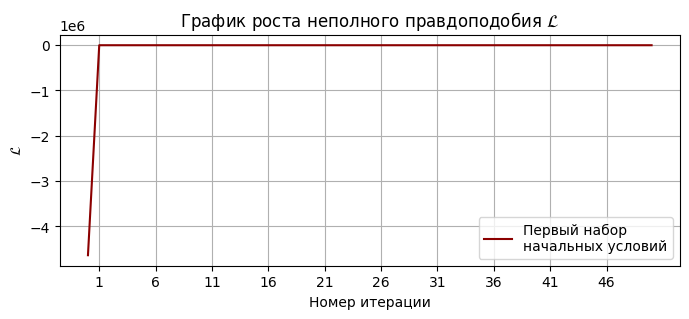

In [22]:
plt.figure(figsize=(8, 3))
plt.title(r'$\text{График роста неполного правдоподобия} \,\,\mathcal{L}$')
plt.plot(x1, lhd_list1, color='darkred', label=f'Первый набор\nначальных условий')
plt.xlabel('Номер итерации') 
plt.ylabel(r'$\mathcal{L}$')
plt.xticks(x_grid)
plt.legend()
plt.grid()
plt.show()

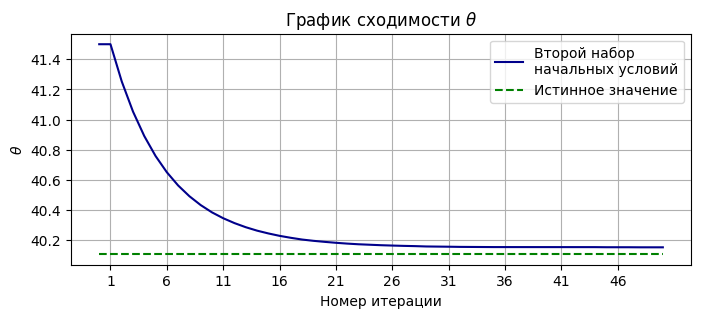

In [23]:
plt.figure(figsize=(8, 3))
plt.title(r'$\text{График сходимости} \,\,\theta$')
plt.plot(x2, angles_list2,color='darkblue', label=f'Второй набор\nначальных условий')
plt.plot(x2, np.tile(theta2_deg, len(angles_list2)), color='green', label='Истинное значение', linestyle='--')
plt.xlabel('Номер итерации') 
plt.ylabel(r'$\theta$')
plt.xticks(x_grid)
plt.legend()
plt.grid()
plt.show()

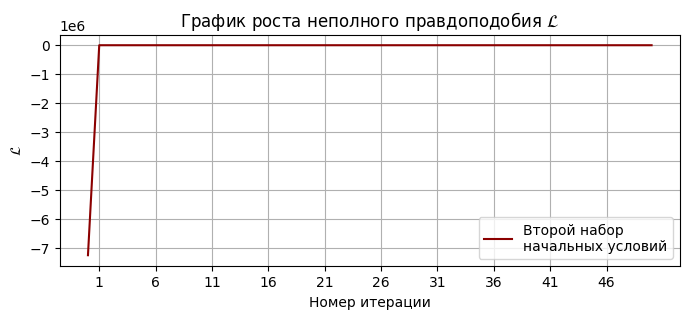

In [24]:
plt.figure(figsize=(8, 3))
plt.title(r'$\text{График роста неполного правдоподобия} \,\,\mathcal{L}$')
plt.plot(x2, lhd_list2,color='darkred', label=f'Второй набор\nначальных условий')
plt.xlabel('Номер итерации') 
plt.ylabel(r'$\mathcal{L}$')
plt.xticks(x_grid)
plt.legend()
plt.grid()
plt.show()

In [25]:
lhd_list2 

array([-7.24518953e+06, -6.68822395e+02, -6.67908606e+02, -6.67737186e+02,
       -6.67651370e+02, -6.67593292e+02, -6.67551592e+02, -6.67520889e+02,
       -6.67497556e+02, -6.67479118e+02, -6.67464025e+02, -6.67451268e+02,
       -6.67440018e+02, -6.67429763e+02, -6.67420215e+02, -6.67411181e+02,
       -6.67402458e+02, -6.67393982e+02, -6.67385652e+02, -6.67377462e+02,
       -6.67369344e+02, -6.67361264e+02, -6.67353212e+02, -6.67345182e+02,
       -6.67337170e+02, -6.67329160e+02, -6.67321154e+02, -6.67313148e+02,
       -6.67305140e+02, -6.67297125e+02, -6.67289112e+02, -6.67281093e+02,
       -6.67273068e+02, -6.67265038e+02, -6.67257003e+02, -6.67248962e+02,
       -6.67240915e+02, -6.67232862e+02, -6.67224803e+02, -6.67216738e+02,
       -6.67208666e+02, -6.67200588e+02, -6.67192504e+02, -6.67184414e+02,
       -6.67176317e+02, -6.67168213e+02, -6.67160104e+02, -6.67151988e+02,
       -6.67143865e+02, -6.67135737e+02, -6.67127602e+02])